In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id ='1kdKJwZ66dL4wBYRQjQfRCqU57wMRF_Ri'
dowloaded = drive.CreateFile({"id": id})
dowloaded.GetContentFile('customer_airways_data.csv')

airways_data=pd.read_csv('customer_airways_data.csv', encoding='ISO-8859-1')
airways_data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [ ]:
id ='1JmUx0ZUXUpIffTIYiuWvxpaM0Yc-dfxe'
dowloaded = drive.CreateFile({"id": id})
dowloaded.GetContentFile('cleaned-reviews.csv')

cleaned_reviews=pd.read_csv('cleaned-reviews.csv', encoding='ISO-8859-1')
cleaned_reviews

,Unnamed: 0,reviews,rates,date,country,verified,comments
0,0,â Trip Verified | Excellent service both on ...,5,2023-01-24,United Kingdom,True,excellent service ground board first class pro...
1,1,â Trip Verified | Good lounge at Cape Town....,9,2023-01-24,United Kingdom,True,good lounge cape town time departure drink hig...
2,2,â Trip Verified | A really excellent journe...,9,2023-01-23,United Kingdom,True,really excellent journey lounge overcrowded la...
3,3,â Trip Verified | This flight was one of th...,9,2023-01-21,United Kingdom,True,flight one worst ever life wanted pamper bough...
4,4,Not Verified | It seems that there is a race t...,2,2023-01-19,United States,False,verified seems race bottom amongst airline can...
...,...,...,...,...,...,...,...
3406,3413,Flew British Airways from Sydney to Venice on ...,10,2014-05-20,Australia,False,flew british airway sydney venice nd april ret...
3407,3414,Recently for our honeymoon we took advantage o...,1,2014-05-19,United Kingdom,False,recently honeymoon took advantage ba promo fly...
3408,3415,LGW-Antigua on 29 April and Antigua-LGW on 13 ...,4,2014-05-18,United Kingdom,False,lgw antigua april antigua lgw may boeing start...
3409,3416,LHR-JTR-LHR. A tale of opposites for BA's new ...,2,2014-05-18,United Kingdom,False,lhr jtr lhr tale opposite ba new route santori...


In [ ]:
airways_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
airways_data.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [ ]:
cleaned_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3411 entries, 0 to 3410
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3411 non-null   int64 
 1   reviews     3411 non-null   object
 2   rates       3411 non-null   int64 
 3   date        3411 non-null   object
 4   country     3411 non-null   object
 5   verified    3411 non-null   bool  
 6   comments    3411 non-null   object
dtypes: bool(1), int64(2), object(4)
memory usage: 163.3+ KB


In [ ]:
cleaned_reviews['reviews'].isnull().count()
#cast_filtrado = cast[cast['character'].isnull()]
reviews_filtrados = cleaned_reviews[~cleaned_reviews.isnull()]
#reviews_filtrados
cleaned_reviews.isnull().sum()

Unnamed: 0    0
reviews       0
rates         0
date          0
country       0
verified      0
comments      0
dtype: int64

In [ ]:
verified_reviews = cleaned_reviews[cleaned_reviews['verified']==True]
short_reviews = verified_reviews.sort_values(['rates'], ascending = False).iloc[:50,:]

In [ ]:
short_reviews.loc[:,['Unnamed: 0', 'reviews']]

,Unnamed: 0,reviews
642,642,â Trip Verified | Lima to Gatwick. Helpful ...
1022,1022,â Trip Verified | British Airways flight man...
261,261,â Trip Verified | Club Europe on British Air...
263,263,"â Trip Verified | Usual BA economy trip, pl..."
271,271,â Trip Verified | This was my first flight d...
805,805,â Trip Verified | London Heathrow to Stuttg...
803,803,â Trip Verified | Manchester to London. The...
293,293,â Trip Verified | For this flight from Heat...
793,793,â Trip Verified | Cape Town to London. Very...
782,782,â Trip Verified | Los Angeles to London Hea...


In [ ]:
short_reviews['reviews'][1022]

'â\x9c\x85 Trip Verified | British Airways flight manager is very professional. I travelled on BA985 from Berlin to Hong Kong via London on 19 Feb. Due to the snowy weather, my flight leaving Berlin to London was delayed, in which I was worried about missing my connecting flight from London to Hong Kong. During the flight, the manager came to me several times, explained to me the reason of flight delay, informed me about the connecting flight arrangements. Her information was very clear, trusted she has been working closely with airport ground on this. Very much appreciated for their service.'

In [ ]:
grp = short_reviews.groupby('country')['rates'].count()

<Axes: title={'center': 'Inserte titulo aqui'}, xlabel='country'>

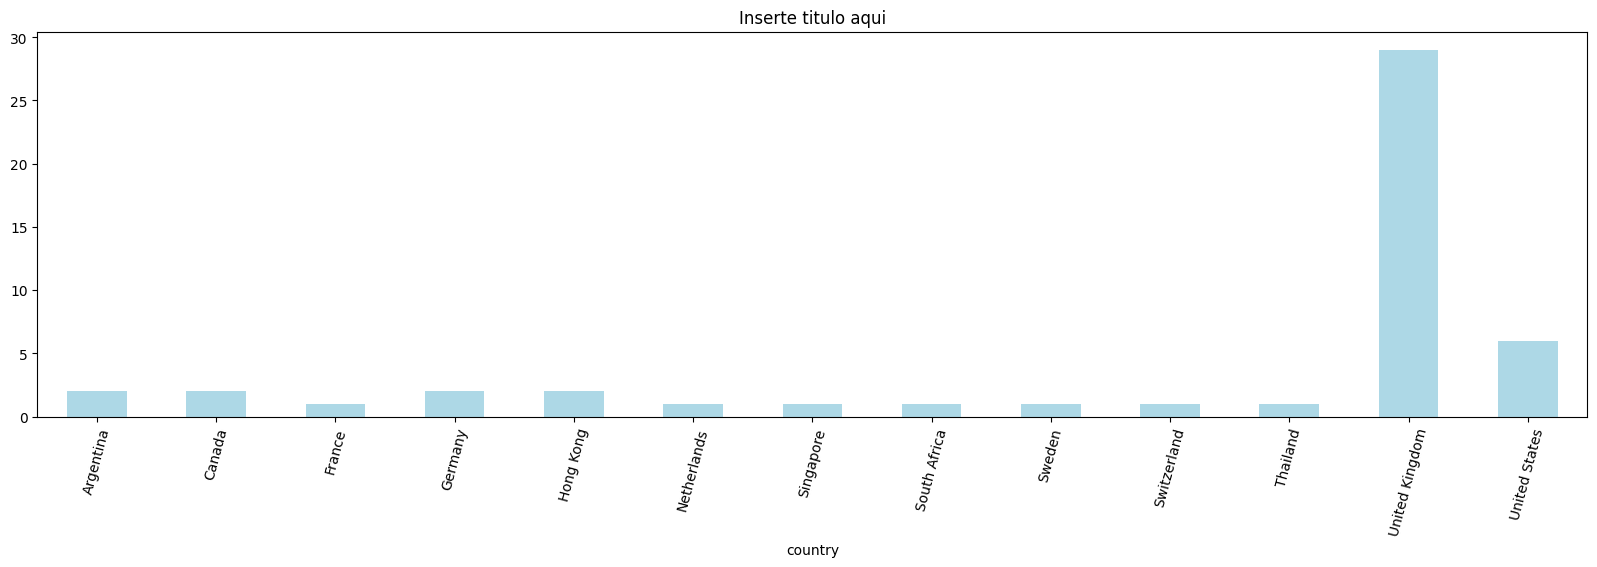

In [ ]:
grp.plot(kind='bar',figsize=(20,5),title='Inserte titulo aqui',rot=75,color='lightblue')